Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

# Random Projections with 1-NN (6 points, 3+3)

Implement random projections for dimensionality reduction as follows.
Randomly generate a $k \times d$ matrix $\mathbf{R}$ by choosing its coefficients
$$
r_{i,j}=
\begin{cases}
+\frac{1}{{\sqrt{d}}} \quad \text{with probability}\quad &\frac{1}{2}\\
-\frac{1}{\sqrt{d}} \quad \text{with probability} \quad & \frac{1}{2}
\end{cases}
$$ 
Let $f:\mathbb{R}^d \rightarrow \mathbb{R}^k$ denote the linear mapping function that 
multiplies a $d$-dimensional vector with this matrix $f(p)=\mathbf{R}p$.
For the following exercises use the same data set as was used for Assignment 1 (MNIST). 
Use the following values of $k=45,90,400$ in your experiments.  
You should not use sklearn.random_projection for this assignment, use numpy instead.


##  (a) 
Evaluate how well the Euclidean distance is preserved by plotting a histogram of the 
values $\phi(p,q) = \frac{\|f(p)-f(q)\|}{\|p-q\|}$.  These values should be concentrated 
around a certain value for fixed $k$. 
What is this value expressed in terms of $k$ and $d$? 


In [47]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

In [50]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 

In [142]:
# Randomly sample with probability 1/2
numpy.random.randint(0,2)

1

## (b)
Compare the performance of a $1$-NN classifier with and without random projection. Report multi-class confusion matrix, precision and recall for each class with and without projection and for each value of $k$.



# PCA of a handwritten digit (7 points, 3+2+2)

Analyze the first two principal components of the class with label $4$ of the MNIST data set (those are images that each depict a handwritten 4). Perfom the steps (a), (b), (c) described below. Note that these steps are similar to the analysis given in the lecture. Include all images and plots in your report. You may use sklearn.decomposition.PCA for this assignment. Do not scale the data.


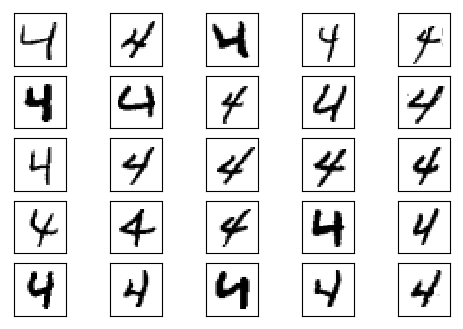

In [73]:
# build a list of figures on a 5x5 grid for plotting
def buildFigure5x5(fig, subfiglist):
    
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

# find the first 25 instances with label '4' and plot them
imgs = np.empty([25, 28*28], dtype='float')
j=0
for i in range(0,len(X)):
    if(y[i] == 4) and j < 25:
        imgs[j] = np.array(X[i], dtype='float')
        j += 1

buildFigure5x5(plt.figure(1),imgs)
plt.show()

## (a)
 Generate a scatter plot of the data in the space spanned by the first two principal components of PCA. Reconstruct $25$ points on a $5 \times 5$ grid in this space that cover the variation of the data. Render each point as an image. Arrange the images in a $5 \times 5$ grid.


## (b) 
For each of the reconstructed points, find the original instance that is closest to it in the projection on the first two components (measured using Euclidean distance). Render the instances arranged in a $5 \times 5$ grid such that their position matches the rendering in (a).


## (c)
Render the mean and the first two principal components as images. What is your interpretation of the first two components, i.e., which aspect of the data do they capture? Justify your interpretation, also using your results of (a) and (b).


# Projection onto a hyperplane (4 points)
Let $F$ be a $k$-dimensional hyperplane given by the parametric representation
$$ g(\lambda) = \mu + \mathbf{V} \lambda,$$
where $\mu \in \mathbb{R}^d$ and the columns of $\mathbf{V}$ are pairwise orthogonal and normal vectors $\mathbf{v_1},\dots,v_k \in \mathbb{R}^d$.
Let $f:\mathbb{R}^d\rightarrow F$ be the projection that maps every point $\mathbf{p} \in \mathbb{R}^d$ to its nearest point on
$F$ (where distances are measured using the Euclidean distance). 

Prove that for any ${\bf p,q} \in \mathbb{R}^d$, it holds that
$$ \|f(\mathbf{p})-f({\bf q})\| \leq \|\mathbf{p-q}\|. $$

(Hint: Write $f(\mathbf{p})$ and $f(\mathbf{q})$ using a projection onto the subspace spanned by the columns of $V$. Rewrite this using a rotation followed by an orthogonal projection. What happens to the distance in each step?)


# Locality-sensitive hashing (3 points, 1+2)

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions. 

## (a)
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to amplify the hash family?



## (b) 
Now assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\mathbf{q}$, we retrieve the points in the hash bucket with index $h(\mathbf{q})$ to search 
for a point which has small distance to $\mathbf{q}$. 
Let $X$ be a random variable that is equal to the size of the set 
$$
\begin{align}
\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\
\end{align}
$$
which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$.